In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
# Step 1: Load your data from CSV file
df = pd.read_csv('seeds.csv') # Replace with your CSV file path
df

,Customer Name,Gender,Comment,Website,Seed Type,Label,Date,Sentiment
0,"Natraj B, Bangalore",1,good quality,Bigbasket,Pumpkin Seeds,-1,2024-02-12,1
1,"Sandhya Rani, Bangalore",0,"become black , bad smell , bad quality , old s...",Bigbasket,Sunflower Seeds,-1,2024-06-11,-1
2,Shovan Chakraborty,1,good,Amazon,Flax Seeds,0,2023-08-10,1
3,Placeholder,-1,nice,Amazon,Seasame Seeds,1,2024-06-30,1
4,Vinit Ranjan,1,"good product , nicely packed - even check auth...",Flipkart,Pumpkin Seeds,1,2024-01-29,1
...,...,...,...,...,...,...,...,...
2976,Krishna Pakala,1,good product,Bigbasket,Flax Seeds,1,2024-06-19,1
2977,vivek mishra,1,using chemical colour,Amazon,Seasame Seeds,-1,2023-07-27,0
2978,Vineesh Peralassery,1,super product healthy food,Flipkart,Pumpkin Seeds,1,2023-12-14,1
2979,sourabh bisht,1,quality much good .seeds smalli buy better qua...,Amazon,Flax Seeds,-1,2023-12-30,1


In [7]:
# Assuming your comments are in a column named 'comments'
comments = df['Comment'] # Replace 'comments' with your actual column name

In [9]:
# Step 2: Create a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Step 3: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

In [10]:
# --- Top Words Visualization ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(10)

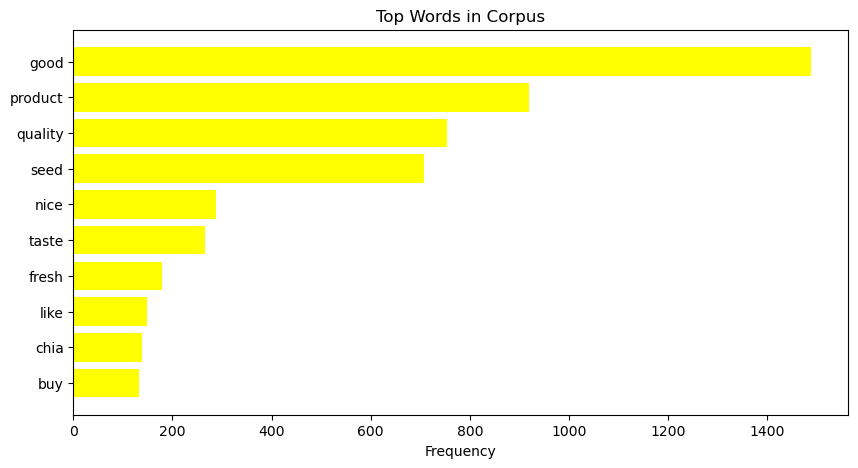

In [13]:
# Plot top words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='yellow')
plt.xlabel('Frequency')
plt.title('Top Words in Corpus')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency on top
plt.show()


In [11]:
# Limit the DataFrame to the first 100 rows for visualization
limited_bag_of_words_df = bag_of_words_df.head(50)

plt.figure(figsize=(12, 8))
plt.imshow(limited_bag_of_words_df, cmap='Greys', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('Comments')
plt.xticks(ticks=np.arange(len(limited_bag_of_words_df.columns)),
           labels=limited_bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(limited_bag_of_words_df)), labels=limited_bag_of_words_df.index)
plt.show()


NameError: name 'bag_of_words_df' is not defined

C:\Users\ojast\anaconda3\Lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\ojast\AppData\Local\Temp\ipykernel_3408\798685891.py:10: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(limited_distances, method='ward')


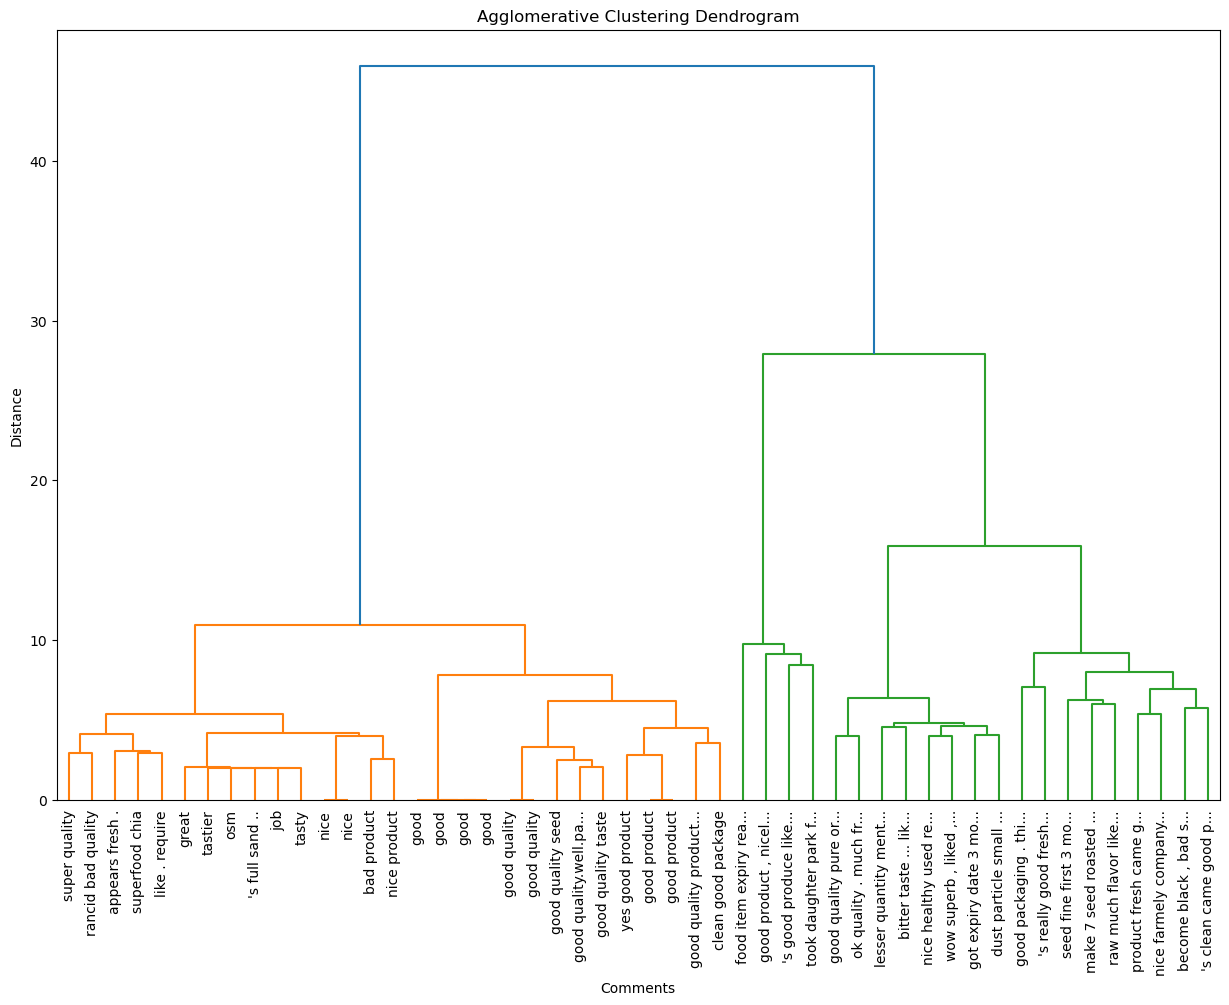

In [16]:
# Limit to the first 50 rows for a clearer view
limited_distances = distances[:50, :50]  # Adjusting for fewer comments
short_comments = [comment[:20] + '...' if len(comment) > 20 else comment for comment in comments[:50]]

# Perform Agglomerative Clustering on the limited data
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(limited_distances)

# Plot Dendrogram with shorter labels and a larger figure size
linkage_matrix_agglo = linkage(limited_distances, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix_agglo, labels=short_comments, leaf_rotation=90, leaf_font_size=10)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Comments')
plt.ylabel('Distance')
plt.show()


C:\Users\ojast\AppData\Local\Temp\ipykernel_3408\2129336386.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(limited_distances, method='ward')


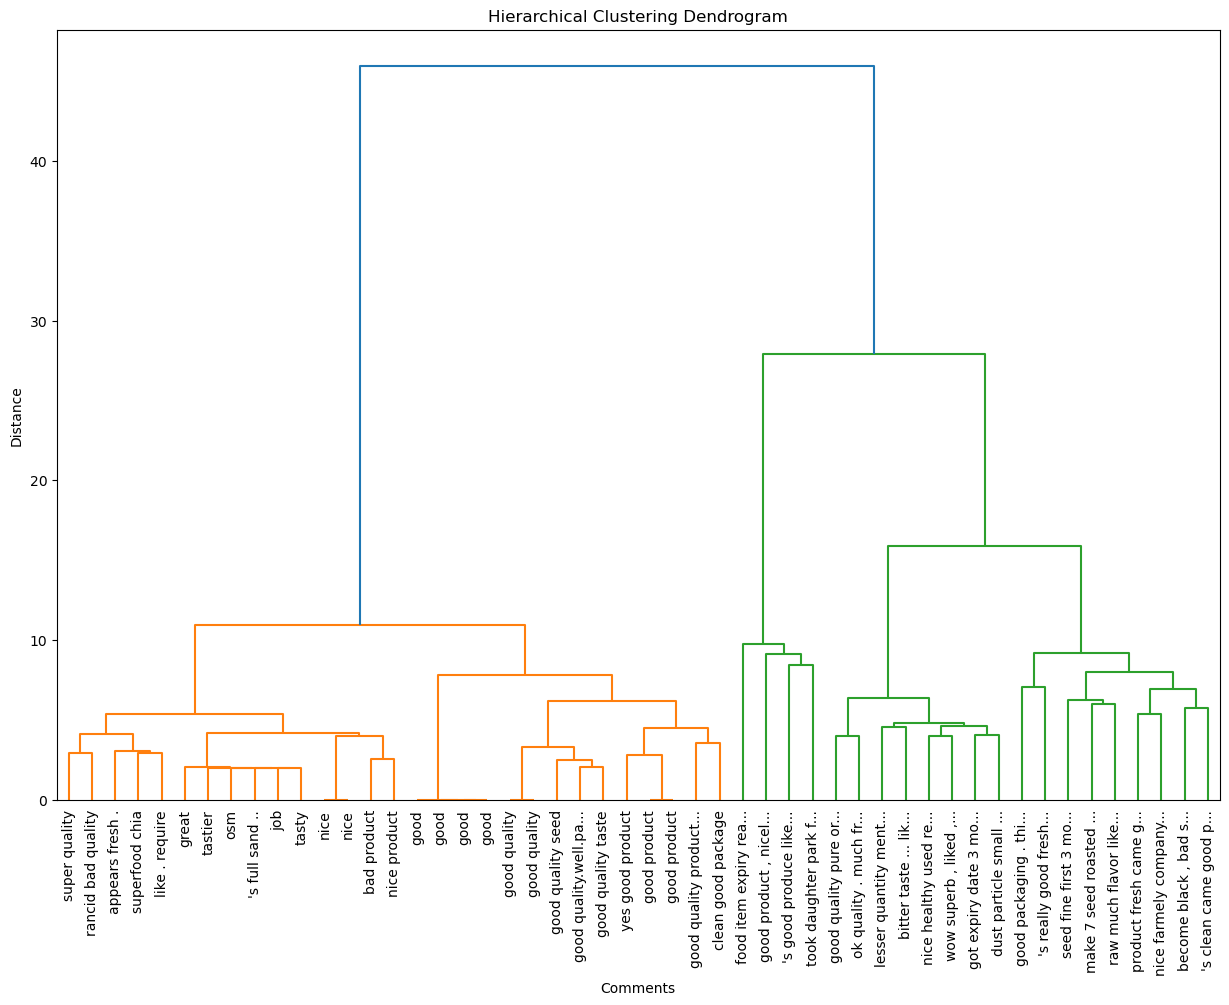

In [18]:
# Limit to the first 50 rows for visualization clarity
limited_distances = distances[:50, :50]  # Ensure distances is symmetric and matches the shape
short_comments = [comment[:20] + '...' if len(comment) > 20 else comment for comment in comments[:50]]

# Step 6: Perform Hierarchical Clustering on the limited data
linkage_matrix_hierarchical = linkage(limited_distances, method='ward')

# Plot the dendrogram with improved readability
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix_hierarchical, labels=short_comments, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Comments')
plt.ylabel('Distance')
plt.show()


In [20]:
# Define the threshold for cutting the dendrogram
max_d = 5

# Optional: Cut the dendrogram to form flat clusters for the limited data
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, criterion='distance')

# Limit the DataFrame to the first 50 rows to match the dendrogram subset
df_limited = df.head(50).copy()

# Add the cluster labels to the limited DataFrame
df_limited['agglo_cluster'] = clusters_agglo
df_limited['hierarchical_cluster'] = clusters_hierarchical

# Print out the comments with their corresponding cluster labels
print(df_limited[['Comment', 'agglo_cluster', 'hierarchical_cluster']])

                                              Comment  agglo_cluster  \
0                                        good quality              4   
1   become black , bad smell , bad quality , old s...             19   
2                                                good              3   
3                                                nice              2   
4   good product , nicely packed - even check auth...              8   
5                                         bad product              2   
6                                      superfood chia              1   
7                      lesser quantity mentio ed sent             11   
8                            nice healthy used remedy             11   
9                                       super quality              1   
10                                                job              2   
11  's good produce like drink chia seed water tha...              6   
12                      good quality product must buy           

In [22]:
import pandas as pd
from tabulate import tabulate

# Load your CSV file (update with your actual CSV file path)
df = pd.read_csv('seeds.csv')

# Define a function to get 1 positive, 1 negative, and 1 neutral comment per website
def get_comments_by_website(df):
    # Create a list to store the result
    result_list = []
    
    # Iterate through each unique website
    for website in df['Website'].unique():
        # Filter comments by sentiment for each website
        positive = df[(df['Website'] == website) & (df['Sentiment'] == 1)]
        negative = df[(df['Website'] == website) & (df['Sentiment'] == -1)]
        neutral = df[(df['Website'] == website) & (df['Sentiment'] == 0)]
        
        # Select 1 comment for each sentiment if available and add to the list
        if not positive.empty:
            result_list.append([website, 'Positive', positive.iloc[0]['Comment']])
        if not negative.empty:
            result_list.append([website, 'Negative', negative.iloc[0]['Comment']])
        if not neutral.empty:
            result_list.append([website, 'Neutral', neutral.iloc[0]['Comment']])
    
    return result_list

# Get the result
result = get_comments_by_website(df)

# Print the results in a table format
print("\nComments by Website:")
print(tabulate(result, headers=['Website', 'Sentiment', 'Comment'], tablefmt='grid'))


Comments by Website:
+-----------+-------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Website   | Sentiment   | Comment                                                                                                                                                         |
+===========+=============+=================================================================================================================================================================+
| Bigbasket | Positive    | good quality                                                                                                                                                    |
+-----------+-------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Bigbasket | Negative    | 

In [24]:
# Creating DUmmy dataset

positive_samples = df[df['Sentiment'] == 1].sample(n=10, random_state=1)
negative_samples = df[df['Sentiment'] == -1].sample(n=10, random_state=1)
neutral_samples = df[df['Sentiment'] == 0].sample(n=10, random_state=1)

# Concatenate the samples to create the dummy dataset
dummy_dataset = pd.concat([positive_samples, negative_samples, neutral_samples])

# Reset index for neatness
dummy_dataset = dummy_dataset.reset_index(drop=True)

# Display or save the dummy dataset
print(dummy_dataset)

                     Customer Name  Gender  \
0                   Hemant Mehta,        1   
1                    Raghav Bansal       1   
2                       bhavana s.       0   
3                Flipkart Customer      -1   
4                               PK      -1   
5                Flipkart Customer      -1   
6                        Dipan Das       1   
7          Hamsini krishna Krishna       0   
8   Santoshkumar, Krishna District       1   
9                Chitralekha Nair,       0   
10           SUDERSANAN MB, Kochi        1   
11               Soumyadipta Mitra       0   
12                           Penny       0   
13                   Nrisingha Das       0   
14                       ziya ezaj       0   
15          Gayathri Bigbasketeer,       0   
16                      Sandhiya h       0   
17        Satyendra Singh, Mumbai        1   
18                         Barnila       0   
19           Srikrishna Nagaraju,        1   
20                    Madishetty, 

In [26]:
dummy_comments = dummy_dataset['Comment']

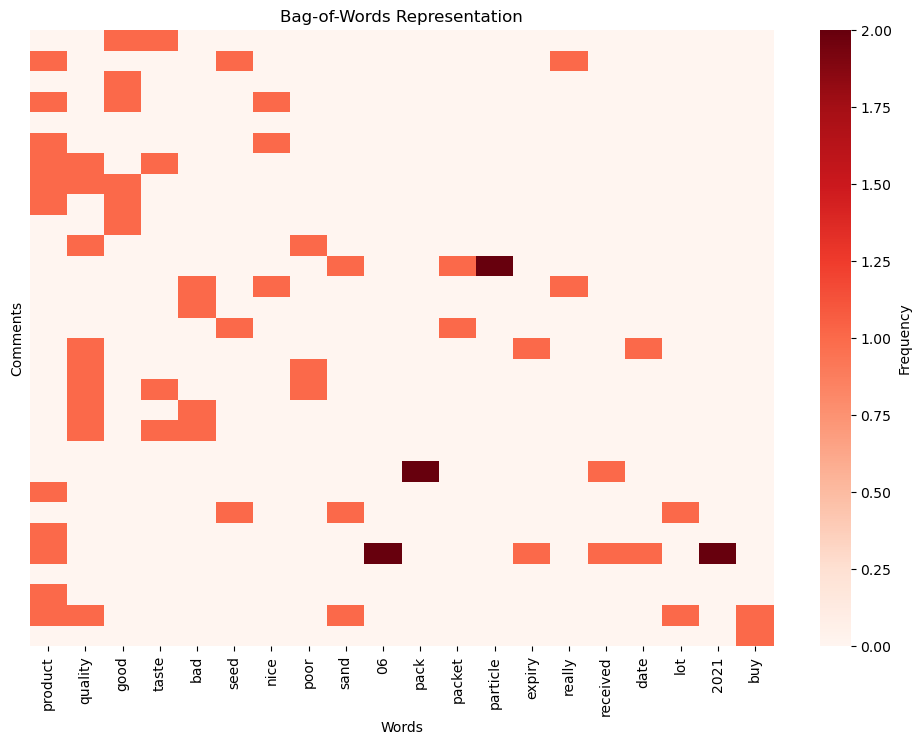

In [28]:
import seaborn as sns
# Use CountVectorizer to create the bag-of-words matrix
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dummy_comments)
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Filter to keep only the top 20 words by frequency
top_words = bag_of_words_df.sum().sort_values(ascending=False).head(20).index
filtered_df = bag_of_words_df[top_words]

# Plotting with seaborn heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_df, cmap='Reds', cbar_kws={'label': 'Frequency'}, yticklabels=False)
plt.title('Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('Comments')
plt.xticks(rotation=90)
plt.show()

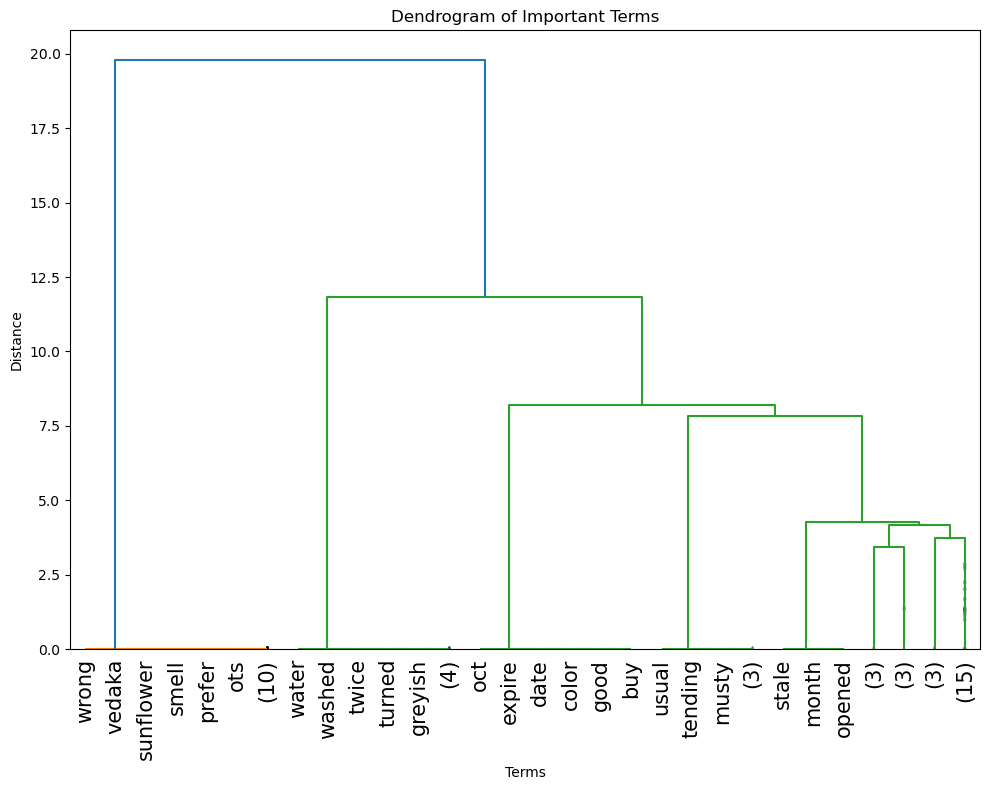

In [34]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Define a list of positive words (customizable)
positive_words = ['happy', 'good', 'great', 'awesome', 'positive', 'love', 'excellent', 'fantastic', 'amazing']

# Load your CSV file
df_new = pd.read_csv('seeds.csv')

# Ensure Comments column is string type
df_new['Comments'] = df_new['Comment'].astype(str)

# Find 10 rows with positive words
positive_data = df_new[df_new['Comments'].str.contains('|'.join(positive_words), case=False, na=False)]

# Ensure we only get 10 positive rows (if there are more, we sample)
positive_sample = positive_data.sample(n=10, random_state=42)

# Randomly sample 15 rows from the dataset (not filtering for positive words)
random_sample = df_new.sample(n=10, random_state=42)

# Combine the 10 positive samples with the 15 random samples
final_sample = pd.concat([positive_sample, random_sample]).drop_duplicates()

# Create a TF-IDF vectorizer without stop word removal for positive words
vectorizer = TfidfVectorizer(stop_words='english')  # We are turning off stop words for now

# Fit the vectorizer to your comment data and transform it into a matrix
X = vectorizer.fit_transform(final_sample['Comments'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Calculate cosine similarity between terms
similarity = cosine_similarity(X.T)

# Create a linkage matrix for hierarchical clustering
linkage_matrix = linkage(similarity, method='ward')

# Sort terms so that positive words come first, but keep the numbers
sorted_terms = sorted(terms, key=lambda x: (x not in positive_words, x))

# Plot the dendrogram
plt.figure(figsize=(10, 8))

dendrogram(
    linkage_matrix, 
    labels=sorted_terms,  # Use sorted labels without removing numbers
    truncate_mode='level',  # Simple truncation to focus on high-level clusters
    p=6,  # Number of clusters to show
    leaf_rotation=90,  # Rotate x-axis labels
    leaf_font_size=15,  # Font size for labels
    show_contracted=True,  # Allows contracted branches
)

plt.title('Dendrogram of Important Terms')
plt.xlabel('Terms')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
